<a href="https://colab.research.google.com/github/deepakvarma3/A-simple-Diabetes-prediction-model-using-Logistic-Regression/blob/main/Diabetes_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
#Load the dataset
data = pd.read_csv('diabetes.csv')
#Display the first few rows
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#Dataset structure
print("\nDataset Info:")
print(data.info())
#Basic statistics
print("\nDataset Description:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dataset Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469 

In [8]:
from sklearn.model_selection import train_test_split
# Features (x) and target (y)
x= data.drop('Outcome', axis=1)  #Drop the 'Outcome' column for features
y = data['Outcome']  #Target variable
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (614, 8)
Testing set size: (154, 8)


In [9]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)
# Train the model using the training data
model.fit(x_train, y_train)
# Evaluate the model on the testimg data
accuracy = model.score(x_test, y_test)
print(f"LogisticRegression Model Accuracy: {accuracy:2f}")

LogisticRegression Model Accuracy: 0.746753


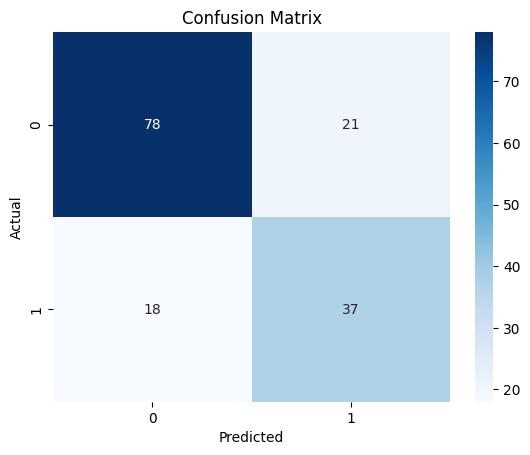


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predictions on the test data
y_pred = model.predict(x_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)    #Incfrease max_iter to 1000
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [17]:
model = LogisticRegression(C=0.1)   #Decrease C for stronger regularization
model.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1)